# Models Tuning

This notebook was run in VScode to view GridSearchCV progress ([ref](https://www.kaggle.com/questions-and-answers/319408)).

Enable auto-reloading of external modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../..")

print('Current location: ', os.getcwd())

Current location:  /Users/falaaharifkhan/Documents/fairness-variance


In [4]:
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint

from source.custom_classes.data_loaders import CompasWithoutSensitiveAttrsDataset
from source.model_tuning_utils import test_baseline_models

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [5]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment

In [6]:
DATASET_NAME = "COMPAS_Without_Sensitive_Attributes"

## Loading ACSEmployment data

In [7]:
dataset = CompasWithoutSensitiveAttrsDataset("./data/COMPAS.csv")

## Tune hyper-parameters and find the best baseline model

Baseline X_train shape:  (4222, 9)
Baseline X_test shape:  (1056, 9)
X_train_features.columns:  Index(['age_cat_Greater than 45_0', 'c_charge_degree_M_1', 'juv_other_count',
       'c_charge_degree_F_0', 'age_cat_Less than 25_0', 'age_cat_25 - 45_1',
       'juv_misd_count', 'age_cat_25 - 45_0', 'priors_count',
       'age_cat_Less than 25_1', 'c_charge_degree_F_1',
       'age_cat_Greater than 45_1', 'c_charge_degree_M_0', 'juv_fel_count'],
      dtype='object')
2023/01/16, 20:16:54: Tuning LogisticRegression...
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[CV 2/3; 3/400] START C=1e-05, max_iter=50, penalty=l1, solver=liblinear........
[CV 2/3; 3/400] END C=1e-05, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.499) F1_Score: (test=0.333) total time=   0.0s
[CV 2/3; 11/400] START C=1e-05, max_iter=100, penalty=l1, solver=newton-cg......
[CV 2/3; 11/400] END C=1e-05, max_iter=100, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (

[CV 1/3; 108/400] END C=0.001, max_iter=50, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.642) F1_Score: (test=0.625) total time=   0.0s
[CV 2/3; 108/400] START C=0.001, max_iter=50, penalty=l2, solver=liblinear......
[CV 2/3; 108/400] END C=0.001, max_iter=50, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.633) F1_Score: (test=0.613) total time=   0.0s
[CV 3/3; 108/400] START C=0.001, max_iter=50, penalty=l2, solver=liblinear......
[CV 3/3; 108/400] END C=0.001, max_iter=50, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.638) F1_Score: (test=0.598) total time=   0.0s
[CV 1/3; 109/400] START C=0.001, max_iter=50, penalty=l2, solver=sag............
[CV 1/3; 109/400] END C=0.001, max_iter=50, penalty=l2, solver=sag; Accuracy_Score: (test=0.634) F1_Score: (test=0.605) total time=   0.0s
[CV 2/3; 109/400] START C=0.001, max_iter=50, penalty=l2, solver=sag............
[CV 2/3; 109/400] END C=0.001, max_iter=50, penalty=l2, solver=sag; Accuracy_Score: (test=0.614) F1_Sc

[CV 3/3; 168/400] END C=0.01, max_iter=100, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.652) F1_Score: (test=0.633) total time=   0.0s
[CV 1/3; 169/400] START C=0.01, max_iter=100, penalty=l2, solver=sag............
[CV 1/3; 169/400] END C=0.01, max_iter=100, penalty=l2, solver=sag; Accuracy_Score: (test=0.643) F1_Score: (test=0.638) total time=   0.1s
[CV 2/3; 169/400] START C=0.01, max_iter=100, penalty=l2, solver=sag............
[CV 2/3; 169/400] END C=0.01, max_iter=100, penalty=l2, solver=sag; Accuracy_Score: (test=0.650) F1_Score: (test=0.646) total time=   0.0s
[CV 3/3; 169/400] START C=0.01, max_iter=100, penalty=l2, solver=sag............
[CV 3/3; 169/400] END C=0.01, max_iter=100, penalty=l2, solver=sag; Accuracy_Score: (test=0.651) F1_Score: (test=0.624) total time=   0.0s
[CV 1/3; 170/400] START C=0.01, max_iter=100, penalty=l2, solver=saga...........
[CV 1/3; 170/400] END C=0.01, max_iter=100, penalty=l2, solver=saga; Accuracy_Score: (test=0.643) F1_Score: (test=

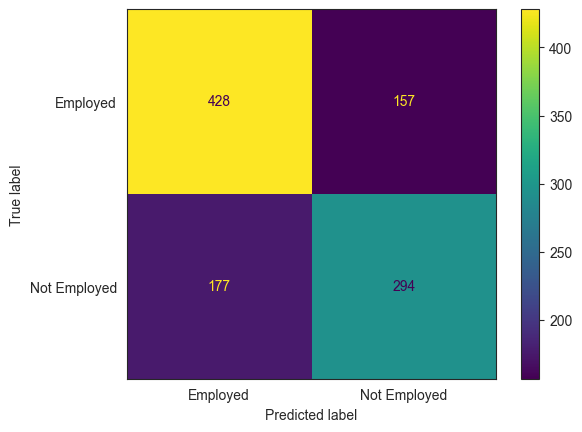

2023/01/16, 20:17:00: Tuning DecisionTreeClassifier...
Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 2/3; 178/400] START C=0.01, max_iter=150, penalty=l2, solver=liblinear......
[CV 2/3; 178/400] END C=0.01, max_iter=150, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.649) F1_Score: (test=0.645) total time=   0.0s
[CV 3/3; 178/400] START C=0.01, max_iter=150, penalty=l2, solver=liblinear......
[CV 3/3; 178/400] END C=0.01, max_iter=150, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.652) F1_Score: (test=0.633) total time=   0.0s
[CV 1/3; 179/400] START C=0.01, max_iter=150, penalty=l2, solver=sag............
[CV 1/3; 179/400] END C=0.01, max_iter=150, penalty=l2, solver=sag; Accuracy_Score: (test=0.643) F1_Score: (test=0.638) total time=   0.1s
[CV 2/3; 179/400] START C=0.01, max_iter=150, penalty=l2, solver=sag............
[CV 2/3; 179/400] END C=0.01, max_iter=150, penalty=l2, solver=sag; Accuracy_Score: (test=0.650) F1_Score: (test=0.646) total time

[CV 1/3; 190/400] END C=0.01, max_iter=200, penalty=l2, solver=saga; Accuracy_Score: (test=0.643) F1_Score: (test=0.638) total time=   0.1s
[CV 2/3; 190/400] START C=0.01, max_iter=200, penalty=l2, solver=saga...........
[CV 2/3; 190/400] END C=0.01, max_iter=200, penalty=l2, solver=saga; Accuracy_Score: (test=0.650) F1_Score: (test=0.646) total time=   0.1s
[CV 3/3; 190/400] START C=0.01, max_iter=200, penalty=l2, solver=saga...........
[CV 3/3; 190/400] END C=0.01, max_iter=200, penalty=l2, solver=saga; Accuracy_Score: (test=0.651) F1_Score: (test=0.624) total time=   0.0s
[CV 1/3; 191/400] START C=0.01, max_iter=250, penalty=l1, solver=newton-cg......
[CV 1/3; 191/400] END C=0.01, max_iter=250, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 191/400] START C=0.01, max_iter=250, penalty=l1, solver=newton-cg......
[CV 2/3; 191/400] END C=0.01, max_iter=250, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (tes

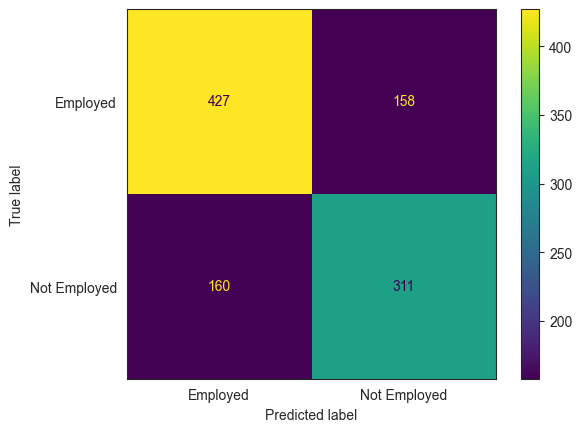

2023/01/16, 20:17:01: Tuning RandomForestClassifier...
Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3; 197/400] START C=0.01, max_iter=250, penalty=l2, solver=lbfgs..........
[CV 1/3; 197/400] END C=0.01, max_iter=250, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.643) F1_Score: (test=0.638) total time=   0.0s
[CV 2/3; 197/400] START C=0.01, max_iter=250, penalty=l2, solver=lbfgs..........
[CV 2/3; 197/400] END C=0.01, max_iter=250, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.650) F1_Score: (test=0.646) total time=   0.0s
[CV 3/3; 197/400] START C=0.01, max_iter=250, penalty=l2, solver=lbfgs..........
[CV 3/3; 197/400] END C=0.01, max_iter=250, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.651) F1_Score: (test=0.624) total time=   0.0s
[CV 1/3; 198/400] START C=0.01, max_iter=250, penalty=l2, solver=liblinear......
[CV 1/3; 198/400] END C=0.01, max_iter=250, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.643) F1_Score: (test=0.638) total tim

[CV 1/3; 205/400] START C=0.1, max_iter=50, penalty=l1, solver=saga.............
[CV 1/3; 205/400] END C=0.1, max_iter=50, penalty=l1, solver=saga; Accuracy_Score: (test=0.644) F1_Score: (test=0.640) total time=   0.0s
[CV 2/3; 205/400] START C=0.1, max_iter=50, penalty=l1, solver=saga.............
[CV 2/3; 205/400] END C=0.1, max_iter=50, penalty=l1, solver=saga; Accuracy_Score: (test=0.644) F1_Score: (test=0.640) total time=   0.0s
[CV 3/3; 205/400] START C=0.1, max_iter=50, penalty=l1, solver=saga.............
[CV 3/3; 205/400] END C=0.1, max_iter=50, penalty=l1, solver=saga; Accuracy_Score: (test=0.651) F1_Score: (test=0.628) total time=   0.0s
[CV 1/3; 206/400] START C=0.1, max_iter=50, penalty=l2, solver=newton-cg........
[CV 1/3; 206/400] END C=0.1, max_iter=50, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.646) F1_Score: (test=0.642) total time=   0.0s
[CV 2/3; 206/400] START C=0.1, max_iter=50, penalty=l2, solver=newton-cg........
[CV 2/3; 206/400] END C=0.1, max_iter=

[CV 1/3; 228/400] START C=0.1, max_iter=150, penalty=l2, solver=liblinear.......
[CV 1/3; 228/400] END C=0.1, max_iter=150, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.646) F1_Score: (test=0.642) total time=   0.0s
[CV 2/3; 228/400] START C=0.1, max_iter=150, penalty=l2, solver=liblinear.......
[CV 2/3; 228/400] END C=0.1, max_iter=150, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.660) F1_Score: (test=0.657) total time=   0.0s
[CV 3/3; 228/400] START C=0.1, max_iter=150, penalty=l2, solver=liblinear.......
[CV 3/3; 228/400] END C=0.1, max_iter=150, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.642) F1_Score: (test=0.634) total time=   0.0s
[CV 1/3; 229/400] START C=0.1, max_iter=150, penalty=l2, solver=sag.............
[CV 1/3; 229/400] END C=0.1, max_iter=150, penalty=l2, solver=sag; Accuracy_Score: (test=0.646) F1_Score: (test=0.642) total time=   0.1s
[CV 2/3; 229/400] START C=0.1, max_iter=150, penalty=l2, solver=sag.............
[CV 2/3; 229/400] END C=0

[CV 2/3; 202/400] START C=0.1, max_iter=50, penalty=l1, solver=lbfgs............
[CV 2/3; 202/400] END C=0.1, max_iter=50, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 202/400] START C=0.1, max_iter=50, penalty=l1, solver=lbfgs............
[CV 3/3; 202/400] END C=0.1, max_iter=50, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 1/3; 203/400] START C=0.1, max_iter=50, penalty=l1, solver=liblinear........
[CV 1/3; 203/400] END C=0.1, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.644) F1_Score: (test=0.640) total time=   0.0s
[CV 2/3; 203/400] START C=0.1, max_iter=50, penalty=l1, solver=liblinear........
[CV 2/3; 203/400] END C=0.1, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.644) F1_Score: (test=0.640) total time=   0.0s
[CV 2/3; 246/400] START C=0.1, max_iter=250, penalty=l2, solver=newton-cg.......
[CV 2/3; 246/400] END C=0.1, max_iter=2

[CV 2/3; 315/400] END C=10, max_iter=100, penalty=l1, solver=saga; Accuracy_Score: (test=0.660) F1_Score: (test=0.657) total time=   0.1s
[CV 3/3; 347/400] START C=10, max_iter=250, penalty=l2, solver=lbfgs............
[CV 3/3; 347/400] END C=10, max_iter=250, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.644) F1_Score: (test=0.637) total time=   0.0s
[CV 1/3; 348/400] START C=10, max_iter=250, penalty=l2, solver=liblinear........
[CV 1/3; 348/400] END C=10, max_iter=250, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.647) F1_Score: (test=0.643) total time=   0.0s
[CV 2/3; 348/400] START C=10, max_iter=250, penalty=l2, solver=liblinear........
[CV 2/3; 348/400] END C=10, max_iter=250, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.660) F1_Score: (test=0.657) total time=   0.0s
[CV 3/3; 348/400] START C=10, max_iter=250, penalty=l2, solver=liblinear........
[CV 3/3; 348/400] END C=10, max_iter=250, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.644) F1_Score: (t

[CV 1/3; 331/400] END C=10, max_iter=200, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 331/400] START C=10, max_iter=200, penalty=l1, solver=newton-cg........
[CV 2/3; 331/400] END C=10, max_iter=200, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 1/3; 353/400] START C=100, max_iter=50, penalty=l1, solver=liblinear........
[CV 1/3; 353/400] END C=100, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.647) F1_Score: (test=0.643) total time=   0.2s
[CV 2/3; 353/400] START C=100, max_iter=50, penalty=l1, solver=liblinear........
[CV 2/3; 353/400] END C=100, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.660) F1_Score: (test=0.657) total time=   0.1s
[CV 3/3; 353/400] START C=100, max_iter=50, penalty=l1, solver=liblinear........
[CV 3/3; 353/400] END C=100, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.644) F1_Score: (

2023/01/16, 20:18:07: Tuning for RandomForestClassifier is finished
####################  COMPAS_Without_Sensitive_Attributes  ####################
Test model:  RandomForestClassifier
Test model parameters:
{'max_depth': 4,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'n_estimators': 500}

              precision    recall  f1-score   support

           0      0.724     0.744     0.734       585
           1      0.670     0.648     0.659       471

    accuracy                          0.701      1056
   macro avg      0.697     0.696     0.696      1056
weighted avg      0.700     0.701     0.700      1056



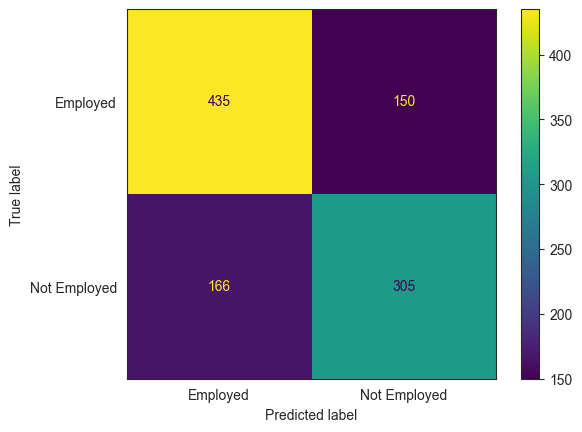

2023/01/16, 20:18:09: Tuning XGBClassifier...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 3/3; 346/400] END C=10, max_iter=250, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.644) F1_Score: (test=0.637) total time=   0.0s
[CV 1/3; 347/400] START C=10, max_iter=250, penalty=l2, solver=lbfgs............
[CV 1/3; 347/400] END C=10, max_iter=250, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.647) F1_Score: (test=0.643) total time=   0.0s
[CV 2/3; 347/400] START C=10, max_iter=250, penalty=l2, solver=lbfgs............
[CV 2/3; 347/400] END C=10, max_iter=250, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.660) F1_Score: (test=0.657) total time=   0.0s
[CV 2/3; 390/400] START C=100, max_iter=200, penalty=l2, solver=saga............
[CV 2/3; 390/400] END C=100, max_iter=200, penalty=l2, solver=saga; Accuracy_Score: (test=0.660) F1_Score: (test=0.657) total time=   0.0s
[CV 1/3; 391/400] START C=100, max_iter=250, penalty=l1, solver=newton-cg.......
[CV 1/3;

[CV 3/3; 393/400] END C=100, max_iter=250, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.644) F1_Score: (test=0.637) total time=   0.1s
[CV 2/3; 395/400] START C=100, max_iter=250, penalty=l1, solver=saga............
[CV 2/3; 395/400] END C=100, max_iter=250, penalty=l1, solver=saga; Accuracy_Score: (test=0.660) F1_Score: (test=0.657) total time=   0.0s
[CV 3/3; 395/400] START C=100, max_iter=250, penalty=l1, solver=saga............
[CV 3/3; 395/400] END C=100, max_iter=250, penalty=l1, solver=saga; Accuracy_Score: (test=0.644) F1_Score: (test=0.637) total time=   0.0s
[CV 2/3; 396/400] START C=100, max_iter=250, penalty=l2, solver=newton-cg.......
[CV 2/3; 396/400] END C=100, max_iter=250, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.660) F1_Score: (test=0.657) total time=   0.0s
[CV 1/3; 398/400] START C=100, max_iter=250, penalty=l2, solver=liblinear.......
[CV 1/3; 398/400] END C=100, max_iter=250, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.647) F1_Score

[CV 2/3; 6/80] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=0.02; Accuracy_Score: (test=0.537) F1_Score: (test=0.431) total time=   0.0s
[CV 3/3; 6/80] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=0.02
[CV 3/3; 6/80] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=0.02; Accuracy_Score: (test=0.567) F1_Score: (test=0.456) total time=   0.0s
[CV 2/3; 14/80] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=0.02
[CV 2/3; 14/80] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=0.02; Accuracy_Score: (test=0.644) F1_Score: (test=0.640) total time=   0.0s
[CV 3/3; 14/80] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=0.02
[CV 3/3; 14/80] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=0.02; Accuracy_Score: (test=0.644) F1_Score: (test=0.636) total time=   0.0s
[CV 2/3; 16/80] START criterion=gini, max_depth=5, max_features=sqrt, mi

2023/01/16, 20:18:32: Tuning for XGBClassifier is finished
####################  COMPAS_Without_Sensitive_Attributes  ####################
Test model:  XGBClassifier
Test model parameters:
{'lambda': 100, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

              precision    recall  f1-score   support

           0      0.729     0.732     0.730       585
           1      0.665     0.662     0.664       471

    accuracy                          0.701      1056
   macro avg      0.697     0.697     0.697      1056
weighted avg      0.701     0.701     0.701      1056



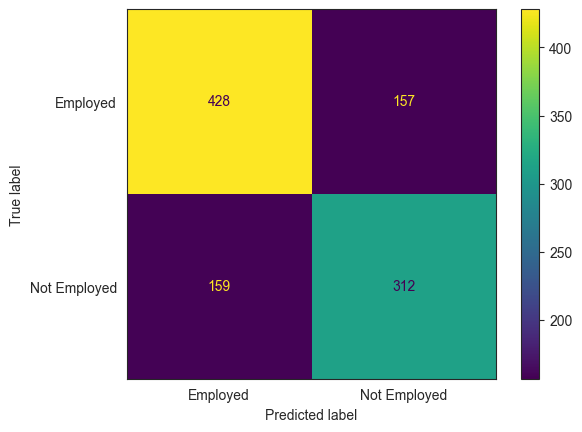

2023/01/16, 20:18:33: Tuning KNeighborsClassifier...
Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV 3/3; 29/80] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=0.01
[CV 3/3; 29/80] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=0.01; Accuracy_Score: (test=0.636) F1_Score: (test=0.626) total time=   0.0s
[CV 1/3; 30/80] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=0.02
[CV 1/3; 30/80] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=0.02; Accuracy_Score: (test=0.644) F1_Score: (test=0.642) total time=   0.0s
[CV 2/3; 46/80] START criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=0.02
[CV 2/3; 46/80] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=0.02; Accuracy_Score: (test=0.537) F1_Score: (test=0.431) total time=   0.0s
[CV 3/3; 46/80] START criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=0.02
[CV 3/3; 46

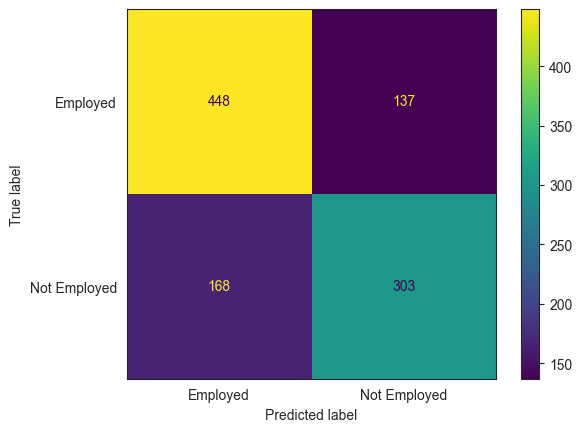

2023/01/16, 20:18:36: Tuning MLPClassifier...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3; 44/80] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.567) F1_Score: (test=0.455) total time=   0.0s
[CV 2/3; 44/80] START criterion=entropy, max_depth=2, max_features=0.6, min_samples_split=0.1
[CV 2/3; 44/80] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.538) F1_Score: (test=0.433) total time=   0.0s
[CV 3/3; 44/80] START criterion=entropy, max_depth=2, max_features=0.6, min_samples_split=0.1
[CV 3/3; 44/80] END criterion=entropy, max_depth=2, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.568) F1_Score: (test=0.458) total time=   0.0s
[CV 1/3; 45/80] START criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=0.01
[CV 1/3; 45/80] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=0.01; Accuracy_Score: (test

[CV 2/3; 64/80] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=0.1; Accuracy_Score: (test=0.593) F1_Score: (test=0.569) total time=   0.0s
[CV 3/3; 64/80] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=0.1
[CV 3/3; 64/80] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=0.1; Accuracy_Score: (test=0.647) F1_Score: (test=0.645) total time=   0.0s
[CV 1/3; 1/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=50
[CV 1/3; 1/144] END max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.641) F1_Score: (test=0.639) total time=   0.2s
[CV 2/3; 4/144] START max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=700
[CV 2/3; 4/144] END max_depth=3, max_features=0.6, min_samples_leaf=1, n_estimators=700; Accuracy_Score: (test=0.652) F1_Score: (test=0.649) total time=   2.5s
[CV 1/3; 9/144] START max_depth=3, max_features=0.6, min_samples_leaf=4, n

[CV 1/3; 37/144] END max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.643) F1_Score: (test=0.641) total time=   0.2s
[CV 2/3; 37/144] START max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=50
[CV 2/3; 37/144] END max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.663) F1_Score: (test=0.661) total time=   0.2s
[CV 2/3; 38/144] START max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=100
[CV 2/3; 38/144] END max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=100; Accuracy_Score: (test=0.656) F1_Score: (test=0.653) total time=   0.4s
[CV 2/3; 39/144] START max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=500
[CV 2/3; 39/144] END max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=500; Accuracy_Score: (test=0.666) F1_Score: (test=0.664) total time=   1.8s
[CV 3/3; 43/144] START max_depth=4, max_features=0.6, min_samples_leaf=2, n_estimators

2023/01/16, 20:20:20: Tuning for MLPClassifier is finished
####################  COMPAS_Without_Sensitive_Attributes  ####################
Test model:  MLPClassifier
Test model parameters:
{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

              precision    recall  f1-score   support

           0      0.716     0.723     0.719       585
           1      0.652     0.643     0.647       471

    accuracy                          0.688      1056
   macro avg      0.684     0.683     0.683      1056
weighted avg      0.687     0.688     0.687      1056



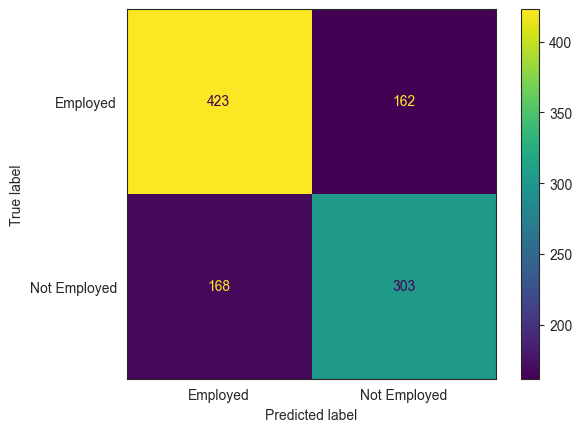

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,COMPAS_Without_Sensitive_Attributes,LogisticRegression,0.678536,0.683712,"{'C': 1, 'max_iter': 50, 'penalty': 'l2', 'sol..."
1,COMPAS_Without_Sensitive_Attributes,DecisionTreeClassifier,0.695186,0.698864,"{'criterion': 'gini', 'max_depth': 20, 'max_fe..."
2,COMPAS_Without_Sensitive_Attributes,RandomForestClassifier,0.696153,0.700758,"{'max_depth': 4, 'max_features': 0.6, 'min_sam..."
3,COMPAS_Without_Sensitive_Attributes,XGBClassifier,0.697103,0.700758,"{'lambda': 100, 'learning_rate': 0.1, 'max_dep..."
4,COMPAS_Without_Sensitive_Attributes,KNeighborsClassifier,0.705624,0.711174,"{'metric': 'minkowski', 'n_neighbors': 25, 'we..."
5,COMPAS_Without_Sensitive_Attributes,MLPClassifier,0.683412,0.687500,"{'activation': 'relu', 'hidden_layer_sizes': (..."


In [8]:
ML_baseline_results_df, best_results_df = test_baseline_models(dataset, dataset_name=DATASET_NAME)
ML_baseline_results_df

In [9]:
best_results_df

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params,Model_Pred
0,COMPAS_Without_Sensitive_Attributes,KNeighborsClassifier,0.705624,0.711174,"{'metric': 'minkowski', 'n_neighbors': 25, 'we...","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [10]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: LogisticRegression
{'C': 1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}


Model name: DecisionTreeClassifier
{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 0.6,
 'min_samples_split': 0.1}


Model name: RandomForestClassifier
{'max_depth': 4,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'n_estimators': 500}


Model name: XGBClassifier
{'lambda': 100, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


Model name: KNeighborsClassifier
{'metric': 'minkowski', 'n_neighbors': 25, 'weights': 'uniform'}


Model name: MLPClassifier
{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}


In [11]:
from datetime import datetime, timezone

now = datetime.now(timezone.utc)
date_time_str = now.strftime("%Y%m%d__%H%M%S")
ML_baseline_results_df.to_csv(os.path.join('results', 'models_tuning', f'tuning_results_{DATASET_NAME}_{date_time_str}.csv'),
                              sep=",", index=False, columns=ML_baseline_results_df.columns, float_format="%.4f")

[CV 2/3; 90/144] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.654) F1_Score: (test=0.651) total time=   0.4s
[CV 2/3; 92/144] START max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=700
[CV 2/3; 92/144] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=700; Accuracy_Score: (test=0.657) F1_Score: (test=0.655) total time=   2.5s
[CV 3/3; 96/144] START max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=700
[CV 3/3; 96/144] END max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=700; Accuracy_Score: (test=0.654) F1_Score: (test=0.650) total time=   2.2s
[CV 3/3; 101/144] START max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50
[CV 3/3; 101/144] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=50; Accuracy_Score: (test=0.654) F1_Score: (test=0.650) total time=   0.2s
[CV 2/3; 102/144] START max_depth=6, max_features=sqrt, min_samples_leaf=2, 

[CV 3/3; 34/48] START lambda=100, learning_rate=0.1, max_depth=3, n_estimators=200
[CV 3/3; 34/48] END lambda=100, learning_rate=0.1, max_depth=3, n_estimators=200; Accuracy_Score: (test=0.668) F1_Score: (test=0.660) total time=   0.3s
[CV 2/3; 35/48] START lambda=100, learning_rate=0.1, max_depth=3, n_estimators=300
[CV 2/3; 35/48] END lambda=100, learning_rate=0.1, max_depth=3, n_estimators=300; Accuracy_Score: (test=0.659) F1_Score: (test=0.657) total time=   0.8s
[CV 1/3; 37/48] START lambda=100, learning_rate=0.1, max_depth=5, n_estimators=100
[CV 1/3; 37/48] END lambda=100, learning_rate=0.1, max_depth=5, n_estimators=100; Accuracy_Score: (test=0.645) F1_Score: (test=0.643) total time=   0.6s
[CV 3/3; 38/48] START lambda=100, learning_rate=0.1, max_depth=5, n_estimators=200
[CV 3/3; 38/48] END lambda=100, learning_rate=0.1, max_depth=5, n_estimators=200; Accuracy_Score: (test=0.667) F1_Score: (test=0.659) total time=   0.4s
[CV 2/3; 39/48] START lambda=100, learning_rate=0.1, max

[CV 3/3; 23/42] END metric=euclidean, n_neighbors=13, weights=uniform; Accuracy_Score: (test=0.657) F1_Score: (test=0.653) total time=   0.2s
[CV 1/3; 24/42] START metric=euclidean, n_neighbors=13, weights=distance........
[CV 1/3; 24/42] END metric=euclidean, n_neighbors=13, weights=distance; Accuracy_Score: (test=0.628) F1_Score: (test=0.623) total time=   0.2s
[CV 1/3; 29/42] START metric=manhattan, n_neighbors=5, weights=uniform..........
[CV 1/3; 29/42] END metric=manhattan, n_neighbors=5, weights=uniform; Accuracy_Score: (test=0.616) F1_Score: (test=0.615) total time=   0.2s
[CV 2/3; 29/42] START metric=manhattan, n_neighbors=5, weights=uniform..........
[CV 2/3; 29/42] END metric=manhattan, n_neighbors=5, weights=uniform; Accuracy_Score: (test=0.615) F1_Score: (test=0.614) total time=   0.2s
[CV 2/3; 36/42] START metric=manhattan, n_neighbors=11, weights=distance........
[CV 2/3; 36/42] END metric=manhattan, n_neighbors=11, weights=distance; Accuracy_Score: (test=0.624) F1_Score

[CV 1/3; 126/144] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.646) F1_Score: (test=0.643) total time=   0.4s
[CV 2/3; 127/144] START max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=500
[CV 2/3; 127/144] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=500; Accuracy_Score: (test=0.654) F1_Score: (test=0.652) total time=   1.9s
[CV 3/3; 131/144] START max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=500
[CV 3/3; 131/144] END max_depth=10, max_features=auto, min_samples_leaf=4, n_estimators=500; Accuracy_Score: (test=0.653) F1_Score: (test=0.649) total time=   1.6s
[CV 3/3; 134/144] START max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 3/3; 134/144] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; Accuracy_Score: (test=0.653) F1_Score: (test=0.648) total time=   0.3s
[CV 1/3; 136/144] START max_depth=10, max_features=sqrt, min_s

[CV 3/3; 135/144] START max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500
[CV 3/3; 135/144] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=500; Accuracy_Score: (test=0.654) F1_Score: (test=0.649) total time=   1.6s
[CV 3/3; 138/144] START max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 3/3; 138/144] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.655) F1_Score: (test=0.651) total time=   0.3s
[CV 1/3; 140/144] START max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=700
[CV 1/3; 140/144] END max_depth=10, max_features=sqrt, min_samples_leaf=2, n_estimators=700; Accuracy_Score: (test=0.647) F1_Score: (test=0.644) total time=   2.8s
[CV 1/3; 1/48] START lambda=1, learning_rate=0.1, max_depth=3, n_estimators=100.
[CV 1/3; 1/48] END lambda=1, learning_rate=0.1, max_depth=3, n_estimators=100; Accuracy_Score: (test=0.645) F1_Score: (test=0.643) total time=   

[CV 1/3; 102/144] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.639) F1_Score: (test=0.636) total time=   0.4s
[CV 2/3; 103/144] START max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=500
[CV 2/3; 103/144] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=500; Accuracy_Score: (test=0.662) F1_Score: (test=0.660) total time=   1.7s
[CV 3/3; 107/144] START max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=500
[CV 3/3; 107/144] END max_depth=6, max_features=sqrt, min_samples_leaf=4, n_estimators=500; Accuracy_Score: (test=0.654) F1_Score: (test=0.650) total time=   1.5s
[CV 3/3; 110/144] START max_depth=10, max_features=0.6, min_samples_leaf=1, n_estimators=100
[CV 3/3; 110/144] END max_depth=10, max_features=0.6, min_samples_leaf=1, n_estimators=100; Accuracy_Score: (test=0.651) F1_Score: (test=0.644) total time=   0.4s
[CV 3/3; 111/144] START max_depth=10, max_features=0.6, min_samples_l

[CV 2/3; 56/144] START max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=700
[CV 2/3; 56/144] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=700; Accuracy_Score: (test=0.661) F1_Score: (test=0.657) total time=   2.4s
[CV 3/3; 60/144] START max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=700
[CV 3/3; 60/144] END max_depth=4, max_features=auto, min_samples_leaf=4, n_estimators=700; Accuracy_Score: (test=0.657) F1_Score: (test=0.653) total time=   2.2s
[CV 1/3; 66/144] START max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100
[CV 1/3; 66/144] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.646) F1_Score: (test=0.642) total time=   0.4s
[CV 2/3; 67/144] START max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=500
[CV 2/3; 67/144] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=500; Accuracy_Score: (test=0.660) F1_Score: (test=0.656) tot